We are builting a recommendation system on the  Amazon Electronic Dataset, downloaded from the Kaggle. Our objective is to build a recommendation system is to enhance the customer experience. We have worked on 

### Popularity-Based Recommandation sysytem 
It offers generalized recommendations to every user, based on product popularity. This system recommends same products to all users and it does not give personalized recommendations to users.

### Collaborative Recommendation system
This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filtering is based on the idea that users similar to a particular user can be used to predict how much that particular user will like a particular product or service those users have used/experienced but that particular user has not.

### Hybrid Recommendation system model 
This system builds an ensemble of Collaborative, Content-Based or Popularity-Based models to come up with a comprehensive Hybrid Recommendation System. Content-Based Recommender-It builds an engine that computes similarity between products based on certain metrics such as description, and suggests products that are most similar to a particular product that a user liked. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.

In [2]:
import pandas as pd


col_names=['user_id','product_id','rating','timestamp']
df=pd.read_csv("/ratings_Electronics.csv", names=col_names)

In [4]:
df.isnull().sum()

user_id       0
product_id    0
rating        0
timestamp     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3449477 entries, 0 to 3449476
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   user_id     object 
 1   product_id  object 
 2   rating      float64
 3   timestamp   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 105.3+ MB


In [6]:
df.head()

,user_id,product_id,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [7]:
df.groupby(['user_id']).rating.mean()

user_id
A00010809P09NUU6ZP6H     5.000000
A00015222LZ55IJSVL5IX    1.000000
A000187635I595IAVSQLH    5.000000
A0002032ZFQKDVHYKGWR     5.000000
A00037441I8XOQJSUWCAG    5.000000
                           ...   
AZZZJXM9GW3C5            5.000000
AZZZOVIBXHGDR            3.333333
AZZZRS1YZ8HVP            4.000000
AZZZWXXUPZ1F3            5.000000
AZZZY1W55XHZR            4.000000
Name: rating, Length: 2169480, dtype: float64

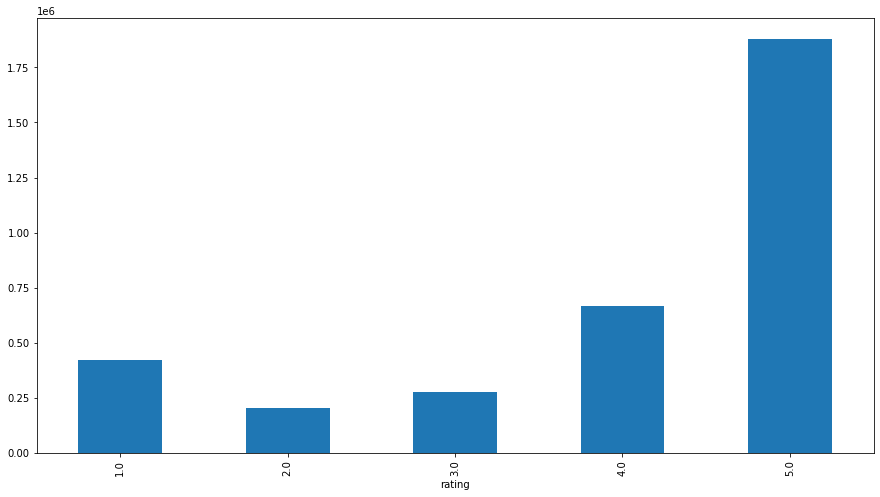

In [8]:
df.groupby(['rating']).rating.count().plot.bar(figsize=(15,8))

In [9]:
x=df.groupby(['product_id']).rating.count().reset_index(name="rating_count")
x

,product_id,rating_count
0,0132793040,1
1,0321732944,1
2,0439886341,3
3,0511189877,6
4,0528881469,27
...,...,...
186474,B003M5FW62,13
186475,B003M5GLPS,1
186476,B003M5GREI,4
186477,B003M5GVJO,1


In [10]:
y=df.groupby(['product_id']).rating.mean().reset_index(name="rating_mean")
x['rating_mean']=y['rating_mean']
x

,product_id,rating_count,rating_mean
0,0132793040,1,5.000000
1,0321732944,1,5.000000
2,0439886341,3,1.666667
3,0511189877,6,4.500000
4,0528881469,27,2.851852
...,...,...,...
186474,B003M5FW62,13,3.538462
186475,B003M5GLPS,1,4.000000
186476,B003M5GREI,4,4.500000
186477,B003M5GVJO,1,5.000000


In [11]:
df_x=x

<Figure size 576x432 with 0 Axes>

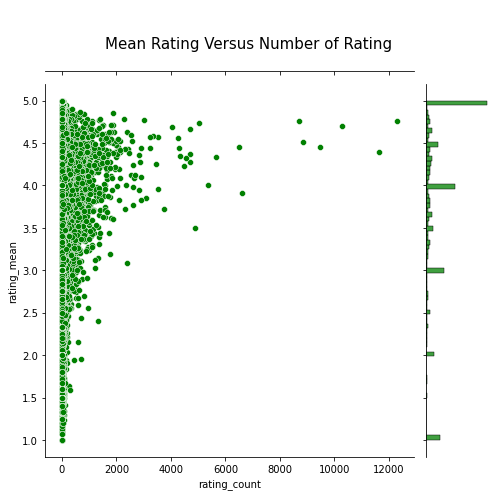

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.jointplot(x='rating_count', y='rating_mean',data=df_x,color='g', height=7)
plt.suptitle('Mean Rating Versus Number of Rating', fontsize=15, y=0.92)
plt.show()

### Popularity-Based Recommender

The weighted rating formula to score the products, which we have used in this section is, as follows:

Weighted Rating (WR) =  (v/v+m)*R+(m/v+m)*C
 
v: the number of votes for the product

m: the minimum votes required to be listed in the chart

R: the average rating of the product

C: the mean vote across the whole report

In [13]:
df_x['rating_count'].quantile(q=0.9)

31.0

In [14]:
df_x['rating_mean'].mean()

3.85612344121542

In [15]:
df_x_filter=df_x[df_x['rating_count']>df_x['rating_count'].quantile(q=0.9)]

In [16]:
df_x_filter

,product_id,rating_count,rating_mean
38,0972683275,1051,4.470980
53,1400501466,250,3.560000
55,1400501520,82,4.243902
57,1400501776,139,3.884892
59,1400532620,171,3.684211
...,...,...,...
186445,B003M4UC2C,102,2.470588
186450,B003M549A2,44,4.431818
186453,B003M567V6,141,4.617021
186470,B003M5BIII,121,4.090909


In [17]:
def product_score(x):
    v=x['rating_count']
    m=25.0 #df_x['rating_count'].quantile(q=0.9)
    R=x['rating_mean']
    C=3.889700263013201 #df_x['rating_mean'].mean()
    return ((R*v)/(v+m))+((C*m)/(v+m))

In [18]:
df_x_filter['score']=df_x_filter.apply(product_score, axis=1)

<ipython-input-18-abb3f303e7b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x_filter['score']=df_x_filter.apply(product_score, axis=1)


In [19]:
df_x_filter.head(5)

,product_id,rating_count,rating_mean,score
38,0972683275,1051,4.470980,4.457474
53,1400501466,250,3.560000,3.589973
55,1400501520,82,4.243902,4.161145
57,1400501776,139,3.884892,3.885625
59,1400532620,171,3.684211,3.710421


In [20]:
df_highscore=df_x_filter.sort_values(by='score', ascending=False).head(10)

In [21]:
df_highscore

,product_id,rating_count,rating_mean,score
180308,B003FVVMS0,1876,4.853412,4.840738
166101,B0033PRWSW,387,4.901809,4.840394
137519,B0029N3U8K,658,4.869301,4.833444
131560,B001W28L2Y,798,4.842105,4.813174
149115,B002NEGTSI,299,4.889632,4.812477
131557,B001W26TIW,735,4.843537,4.812161
6014,B000053HC5,166,4.945783,4.807552
121050,B001MSZBNA,600,4.841667,4.803588
91723,B00125Y0NU,525,4.841905,4.798623
60727,B000I1X3W8,253,4.869565,4.781448


In [22]:
df_highscore.product_id

180308    B003FVVMS0
166101    B0033PRWSW
137519    B0029N3U8K
131560    B001W28L2Y
149115    B002NEGTSI
131557    B001W26TIW
6014      B000053HC5
121050    B001MSZBNA
91723     B00125Y0NU
60727     B000I1X3W8
Name: product_id, dtype: object

### Collaborative Recommandation system

In [3]:
import numpy as np
from surprise import SVD, Reader, Dataset 
from surprise.model_selection import cross_validate
svd = SVD()

In [4]:
reader = Reader()

In [5]:
data = Dataset.load_from_df(df[['user_id', 'product_id', 'rating']], reader)

In [ ]:
#cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

In [7]:
trainset = data.build_full_trainset()

In [8]:
svd.fit(trainset)

In [9]:
df[df['user_id'] == 'AKM1MP6P0OYPR']

,user_id,product_id,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
5200191,AKM1MP6P0OYPR,B005UEB5TQ,5.0,1366243200


In [10]:
svd.predict(uid='A17HMM1M7T9PJ1', iid='0970407998', r_ui=None)

Prediction(uid='A17HMM1M7T9PJ1', iid='0970407998', r_ui=None, est=3.9234829531426225, details={'was_impossible': False})

In [11]:
svd.predict(uid='A17HMM1M7T9PJ1', iid='0970407998', r_ui=None).est

3.9234829531426225

### Collaborative Recommender

In [12]:
df_users=df.groupby('user_id').filter(lambda x: x['rating'].count()>=50)

In [13]:
df_users.head()

,user_id,product_id,rating,timestamp
94,A3BY5KCNQZXV5U,0594451647,5.0,1390176000
118,AT09WGFUM934H,0594481813,3.0,1377907200
177,A32HSNCNPRUMTR,0970407998,1.0,1319673600
178,A17HMM1M7T9PJ1,0970407998,4.0,1281744000
492,A3CLWR1UUZT6TG,0972683275,5.0,1373587200


In [14]:
df_users.shape

(125871, 4)

In [15]:
matrix=pd.pivot_table(data=df_users, values='rating', index='user_id',columns='product_id')

In [16]:
matrix.head()

product_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_id,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A100WO06OQR8BQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A105S56ODHGJEK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A105TOJ6LTVMBG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10AFVU66A79Y1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Function that takes in productId and useId as input and outputs up to 5 most similar products.
def hybrid_recommendations(userId, productId):
    
    # Get the Id of the top five products that are correlated with the ProductId chosen by the user.
    top_five=matrix.corrwith(matrix[productId]).sort_values(ascending=False).head(5)
    
    # Predict the ratings the user might give to these top 5 most correlated products.
    est_rating=[]
    for x in list(top_five.index):
        if str(top_five[x])!='nan':
            est_rating.append(svd.predict(userId, iid=x, r_ui=None).est)
           
    return pd.DataFrame({'productId':list(top_five.index)[:len(est_rating)], 'estimated_rating':est_rating}).sort_values(by='estimated_rating', ascending=False).reset_index(drop=True)

In [18]:
hybrid_recommendations('A2NYK9KWFMJV4Y', 'B00LI4ZZO8')

/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,productId,estimated_rating
0,B00KIMX4EY,5.000000
1,B00D1QC50S,4.659253
2,B005I7X3RC,4.621912
3,B00ETH7ERM,4.570015
4,B00FRBCSUW,4.502244
